### Comments

### Import libraries

In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io.json import json_normalize

import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *

import time

from datetime import datetime
from dateutil import tz

from lxml import objectify

from bibliopixel import *
from bibliopixel.drivers.LPD8806 import *
from bibliopixel import LEDStrip
import bibliopixel.colors as colors



### Setting paths for different data files

In [6]:
path = ((97121730,'Lindblom_1Jan2006_16Feb2016_meter097121730.xml'), 
        (97164773,'Lindblom_1Jan2006_16Feb2016_meter097164773.xml'), 
        (116732826,'Lindblom_1Jan2006_16Feb2016_meter116732826.xml'),
        (270221033,'Lindblom_1Jan2010_16Feb2016_meter 270221033.xml'),
        (117741629,'Lindblom_1Jan2010_16Feb2016_meter117741629.xml'),
        (121241474,'Lindblom_1Jan2010_16Feb2016_meter121241474.xml'),
        (141379505,'Lindblom_1Jan2010_16Feb2016_meter141379505.xml'),
        (141437371,'Lindblom_1Jan2010_16Feb2016_meter141437371.xml'),
        (141515717,'Lindblom_1Jan2010_16Feb2016_meter141515717 .xml'),
        (141629836,'Lindblom_1Jan2010_16Feb2016_meter141629836.xml'),
        (230130186,'Lindblom_1Jan2010_16Feb2016_meter230130186.xml'),
        (230130187,'Lindblom_1Jan2010_16Feb2016_meter230130187.xml'),
        (230130188,'Lindblom_1Jan2010_16Feb2016_meter230130188.xml')
       )


In [7]:
tz_offset = -21600 + 3600 #Central DST
def xml_df(path, meterID):
    
    xml = objectify.parse(open(path))
    root = xml.getroot()
    obj_top = root.getchildren()[6].getchildren()[4].getchildren()
    length = len(obj_top)
    
    df = pd.DataFrame(columns=('duration', 'time_stamp', 'value', 'meter ID')) 
    
    for i in range(length): #takes a while to run 
        length2 = len(obj_top[i].getchildren())
        for j in range(1, length2): # element 0 is info. 
        
            obj = obj_top[i].getchildren()[j].getchildren()
            row = dict(zip(['duration', 'time_stamp', 'value', 'meter ID'], 
                           [int(obj[0].getchildren()[0]), int(obj[0].getchildren()[1])+tz_offset, float(obj[1]), meterID]))
            row_s = pd.Series(row)
            row_s.name = (i*length2) + (j-1)
            df = df.append(row_s)
            
    df['time_stamp']=pd.to_datetime(df['time_stamp'],unit='s')
    df['value']=df.value/1000
    
    return df



In [8]:
def gbplot(df,clr,meterID):
    ax=df.plot(x='time_stamp', y='value',title="Dunne-meter"+str(meterID),marker='.',color=clr)
    plt.gcf().autofmt_xdate()
    
    ax.set_xlabel("Date")
    ax.set_ylabel("kWh")
    
    #scatter(df1['datetime'],df1['value'])
    #ax.set_xlim(['2015-01-01 00:00:00','2016-03-07 00:00:00']) #FULL RANGE
    #ax.set_xlim(['2014-01-01 00:00:00','2014-12-31 00:00:00']) #Look at 2014
    #ax.set_xlim(['2015-09-01 00:00:00','2015-09-30 00:00:00']) #Look at September 2014
    #ax.set_xlim(['2015-09-07 00:00:00','2015-09-14 00:00:00']) #Look at One week in September 2014
    #ax.set_xlim(['2015-09-09 00:00:00','2015-09-10 00:00:00']) #Look at Weekday in September 2014
    return

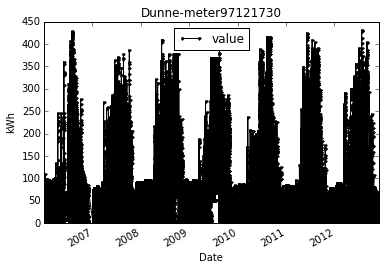

In [9]:
## Meter 1
meterID = path[0][0]
current_path = path[0][1]
df_1 = xml_df(current_path, meterID)

gbplot(df_1,'black',meterID)


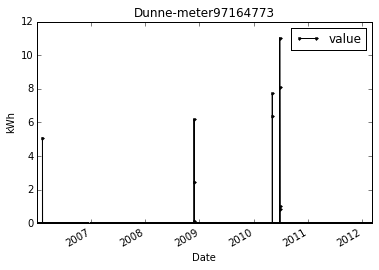

In [10]:
## Meter 2
meterID = path[1][0]
current_path = path[1][1]
df_2 = xml_df(current_path, meterID)

gbplot(df_2,'black',meterID)


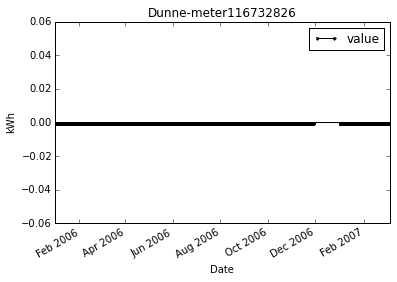

In [11]:
## Meter 3
meterID = path[2][0]
current_path = path[2][1]
df_3 = xml_df(current_path, meterID)

gbplot(df_3,'black',meterID)


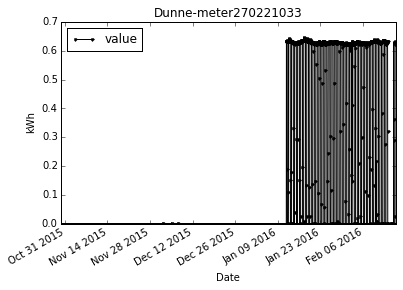

In [12]:
## Meter 4
meterID = path[3][0]
current_path = path[3][1]
df_4 = xml_df(current_path, meterID)

gbplot(df_4,'black',meterID)

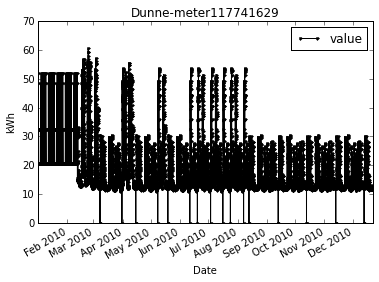

In [13]:
## Meter 5
meterID = path[4][0]
current_path = path[4][1]
df_5 = xml_df(current_path, meterID)

gbplot(df_5,'black',meterID)

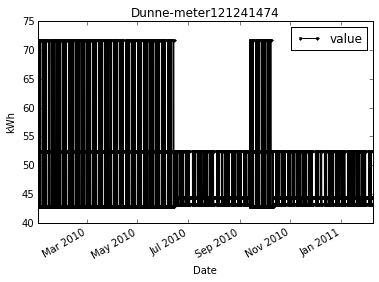

In [14]:
## Meter 6
meterID = path[5][0]
current_path = path[5][1]
df_6 = xml_df(current_path, meterID)

gbplot(df_6,'black',meterID)

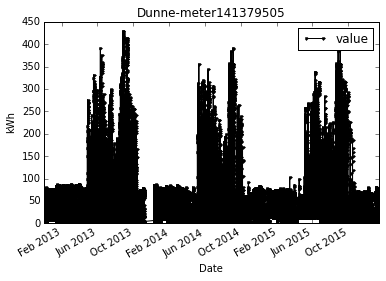

In [15]:
## Meter 7
meterID = path[6][0]
current_path = path[6][1]
df_7 = xml_df(current_path, meterID)

gbplot(df_7,'black',meterID)

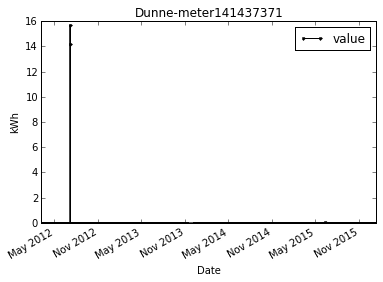

In [16]:
## Meter 8
meterID = path[7][0]
current_path = path[7][1]
df_8 = xml_df(current_path, meterID)

gbplot(df_8,'black',meterID)

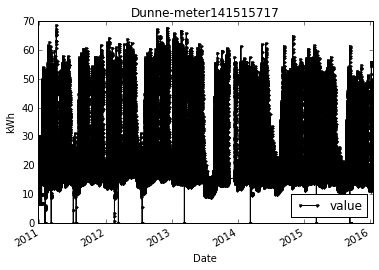

In [17]:
## Meter 9
meterID = path[8][0]
current_path = path[8][1]
df_9 = xml_df(current_path, meterID)

gbplot(df_9,'black',meterID)

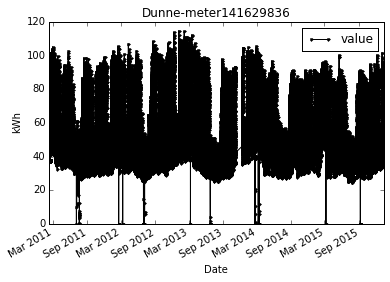

In [18]:
## Meter 10
meterID = path[9][0]
current_path = path[9][1]
df_10 = xml_df(current_path, meterID)

gbplot(df_10,'black',meterID)

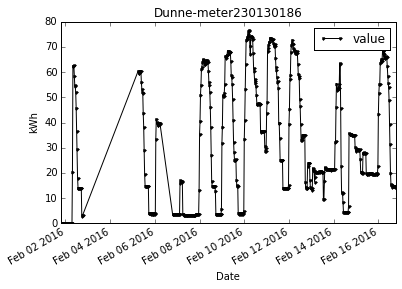

In [19]:
## Meter 11
meterID = path[10][0]
current_path = path[10][1]
df_11 = xml_df(current_path, meterID)

gbplot(df_11,'black',meterID)

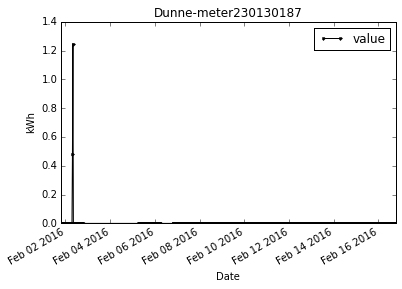

In [20]:
## Meter 12
meterID = path[11][0]
current_path = path[11][1]
df_12 = xml_df(current_path, meterID)

gbplot(df_12,'black',meterID)

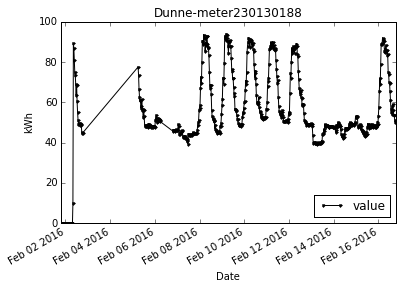

In [21]:
## Meter 13
meterID = path[12][0]
current_path = path[12][1]
df_13 = xml_df(current_path, meterID)

gbplot(df_13,'black',meterID)

In [32]:
## Adding data from all meters

df_total = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13])
df_total
df_group = df_total.groupby('time_stamp')
df_new = df_group['value'].sum()


### Yearly Trend

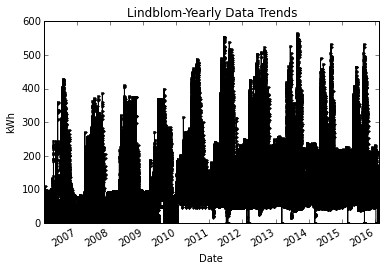

In [23]:

ax = df_new.plot(x='time_stamp', y='value', title="Lindblom-Yearly Data Trends",marker='.',color='black')

ax.set_xlabel("Date")
ax.set_ylabel("kWh")


### Weekly Trend

(735860.0, 735867.0)

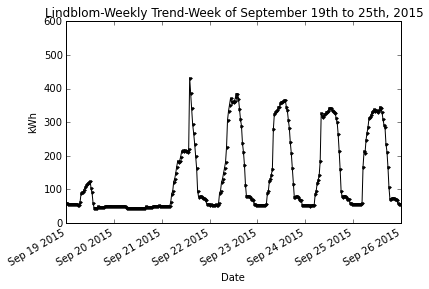

In [25]:
ax = df_new.plot(x='time_stamp', y='value', title="Lindblom-Weekly Trend-Week of September 19th to 25th, 2015",marker='.',color='black')

ax.set_xlabel("Date")
ax.set_ylabel("kWh")

ax.set_xlim(['2015-9-19 00:00:00','2015-9-26 00:00:00'])  ## For 1 day value


###Daily Trend

(0, 400)

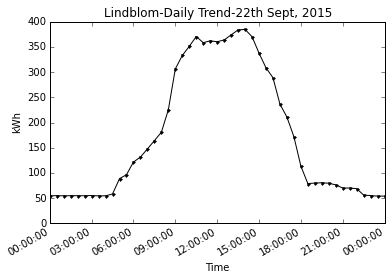

In [56]:
ax = df_new.plot(x='time_stamp', y='value', title="Lindblom-Daily Trend-22th Sept, 2015",marker='.',color='black')

ax.set_xlabel("Time")
ax.set_ylabel("kWh")

ax.set_xlim(['2015-09-22 00:00:00','2015-09-23 00:00:00']) ## For 1 day in September
ax.set_ylim(0,400)

### Saving the data

In [28]:
df_new.to_pickle('Lindblom_Daily_Average')
df_total.to_pickle('Lindblom_All_meters_concat')

In [33]:
df_total2 = pd.read_pickle('All_meters_concat')
df_new2 = pd.read_pickle('Dunne_Daily_Average')

(array([ 735863.   ,  735863.125,  735863.25 ,  735863.375,  735863.5  ,
         735863.625,  735863.75 ,  735863.875,  735864.   ]),
 <a list of 9 Text xticklabel objects>)

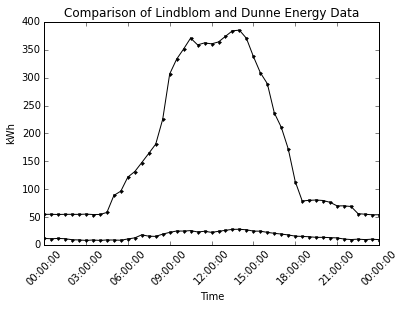

In [55]:
fig, ax = plt.plot(pd.to_datetime(df_new.index), df_new.values, df_new2.index, df_new2.values, marker='.',color='black')

plt.title('Comparison of Lindblom and Dunne Energy Data')
plt.xlabel("Time")
plt.ylabel("kWh")


plt.xlim(['2015-09-22 00:00:00','2015-09-23 00:00:00']) ## For 1 day in September
plt.ylim(0,400)
plt.xticks(rotation=45)